## Q1

In [141]:
k = 1.3806488e-23;
T = 294.15;
Mh = 6.64648e-27;
Ma = 6.6335e-26;
v = 0:10:4000;

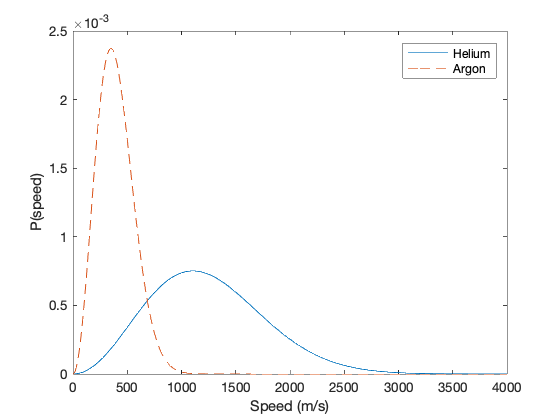

In [142]:
Ph = (Mh / (2*pi*k*T))^(3/2)*4*pi*v.^2.*exp(-(Mh.*v.^2)/(2*k*T));
Pa = (Ma / (2*pi*k*T))^(3/2)*4*pi*v.^2.*exp(-(Ma.*v.^2)/(2*k*T));

plot(v, Ph, 'DisplayName', 'Helium')
hold on 
plot(v, Pa, '--', 'DisplayName', 'Argon')
legend()
xlabel('Speed (m/s)')
ylabel('P(speed)')

## Q2

For two gases at the same temperature the helium atoms move at higher speeds (on aver- age) than the argon atoms (for two gases at the same temperature). Their speeds are also distributed over a wider range.

## Q3

In [21]:
vh_mean = sqrt(8*k*T/(pi*Mh))
vh_prob = sqrt(2*k*T/(Mh))

va_mean = sqrt(8*k*T/(pi*Ma))
va_prob = sqrt(2*k*T/(Ma))


vh_mean =

   1.2474e+03


vh_prob =

   1.1055e+03


va_mean =

  394.8433


va_prob =

  349.9207



## Q4

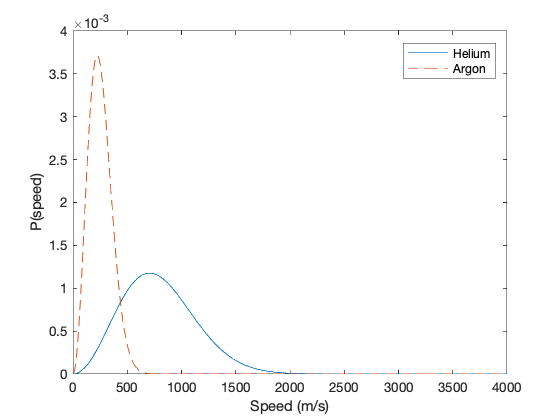

In [23]:
T = 120;
Ph = (Mh / (2*pi*k*T))^(3/2)*4*pi*v.^2.*exp(-(Mh.*v.^2)/(2*k*T));
Pa = (Ma / (2*pi*k*T))^(3/2)*4*pi*v.^2.*exp(-(Ma.*v.^2)/(2*k*T));

plot(v, Ph, 'DisplayName', 'Helium')
hold on 
plot(v, Pa, '--', 'DisplayName', 'Argon')
legend()
xlabel('Speed (m/s)')
ylabel('P(speed)')

## Q5

In [39]:
T = 294.15;
Ph = (Mh / (2*pi*k*T))^(3/2)*4*pi*v.^2.*exp(-(Mh.*v.^2)/(2*k*T));

sample_v = rand([1000,1]) * max(v);
sample_p = rand([1000,1]) * max(Ph);
Pv_sample = (Mh / (2*pi*k*T))^(3/2)*4*pi*sample_v.^2.*exp(-(Mh.*sample_v.^2)/(2*k*T));
ac = sample_p < Pv_sample;

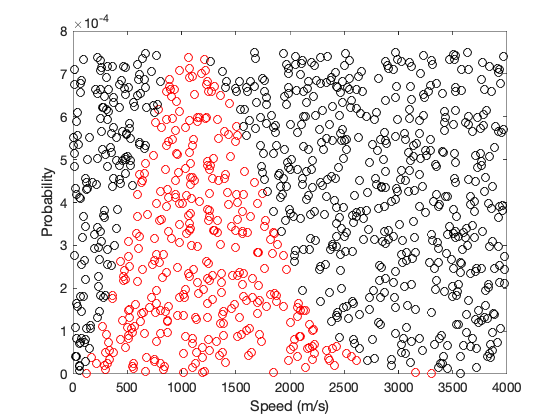

In [51]:
plot(sample_v(ac), sample_p(ac), 'ro')
hold on 
plot(sample_v(~ac), sample_p(~ac), 'ko')

xlabel('Speed (m/s)')
ylabel('Probability')

## Q6

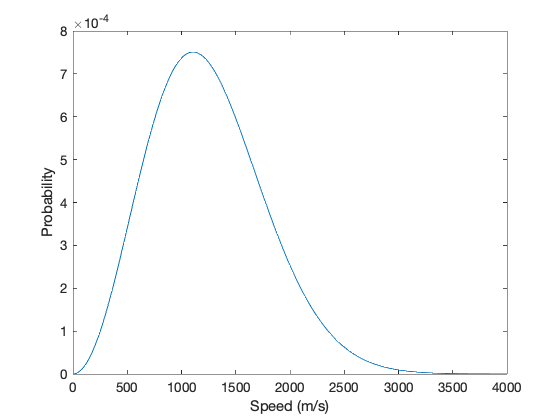

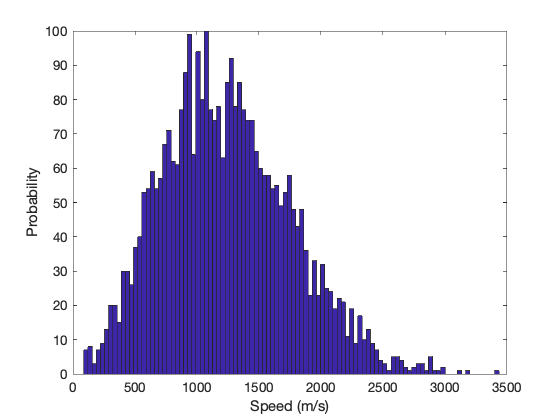

In [67]:
T = 294.15;
Ph = (Mh / (2*pi*k*T))^(3/2)*4*pi*v.^2.*exp(-(Mh.*v.^2)/(2*k*T));

sample_v = rand([10000,1]) * max(v);
sample_p = rand([10000,1]) * max(Ph);
Pv_sample = (Mh / (2*pi*k*T))^(3/2)*4*pi*sample_v.^2.*exp(-(Mh.*sample_v.^2)/(2*k*T));
ac = sample_p < Pv_sample;

hist(sample_v(ac), 100)
xlabel('Speed (m/s)')
ylabel('Probability')

figure()
plot(v, Ph)
xlabel('Speed (m/s)')
ylabel('Probability')

## Q7

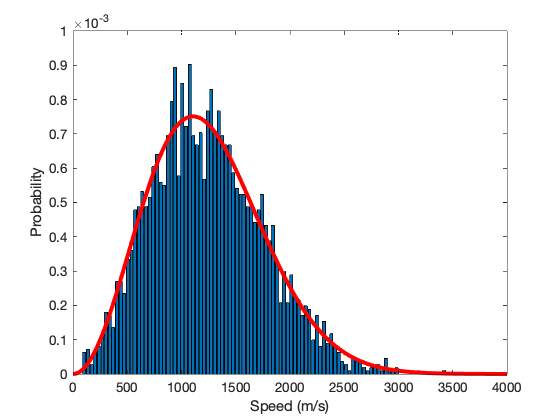

In [89]:
[N, X] = hist(sample_v(ac), 100);
A_hist = sum((X(2) - X(1)) * N);

bar(X, N/A_hist)
xlabel('Speed (m/s)')
ylabel('Probability')
hold on
plot(v, Ph, 'r', 'LineWidth', 3)

## Q8

In [135]:
%%file MH.m
function v2 = MH(v1)
    Mh = 6.64648e-27;
    T = 294.15;
    k = 1.3806488e-23;
    
    v2 = 100*randn(1) + v1;
    P1 = (Mh / (2*pi*k*T))^(3/2)*4*pi*v1^2*exp(-(Mh*v1^2)/(2*k*T));
    P2 = (Mh / (2*pi*k*T))^(3/2)*4*pi*v2^2*exp(-(Mh*v2^2)/(2*k*T));
    alpha = P2/P1;
    if (rand() > alpha) | (v2 < 0)
        v2 = v1;
    end
end

Created file '/Users/rzhu/Documents/PhD/Computational_Lab/Lab9/MH.m'.


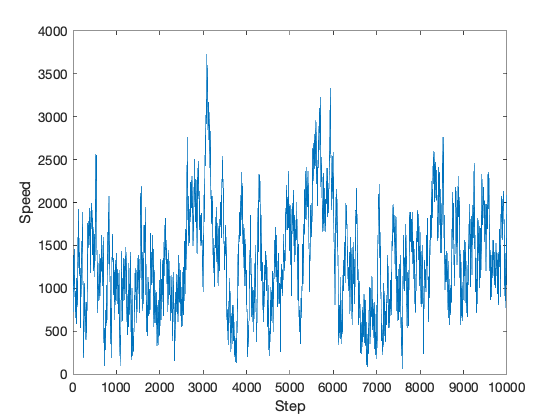

In [145]:
vs = zeros(10000,1);
vs(1) = 1000;
for i = 2:length(vs)
    vs(i) = MH(vs(i-1));
end

plot(vs)
xlabel('Step')
ylabel('Speed')

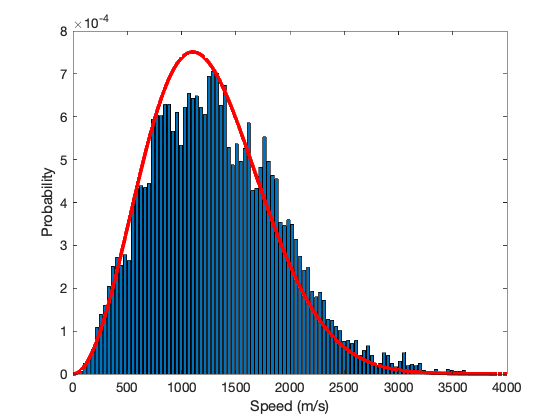

In [146]:
[N, X] = hist(vs, 100);
A_hist = sum((X(2) - X(1)) * N);
v = 1:4000;
Ph = (Mh / (2*pi*k*T))^(3/2)*4*pi*v.^2.*exp(-(Mh.*v.^2)/(2*k*T));

bar(X, N/A_hist)
xlabel('Speed (m/s)')
ylabel('Probability')
hold on
plot(v, Ph, 'r', 'LineWidth', 3)

## Q10

The result is simply a random walk as there is no dependence on the target probability distri- bution.

## Q11

The algorithm immediately goes to the part of the probability distribution with the highest likelihood and stays there.